### Student Information
Name: David-Oliver Matzka

Student ID: J144030004

GitHub ID:  71775245

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

# Phase 1
- Load data
- Minimal cleaning/tokenization
- EDA (labels, lengths)
- Bag-of-Words (CountVectorizer)
- Top tokens overall and per label

In [3]:
# Phase 1 — Setup & Load

import os, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, CountVectorizer

pd.set_option("display.max_colwidth", 200)
sns.set(style="whitegrid", font_scale=1.0)

RAW_URL = "https://raw.githubusercontent.com/leoson-wu/DM2025-Lab1-Exercise/main/newdataset/Reddit-stock-sentiment.csv"
OUT_DIR = "outputs"
os.makedirs(OUT_DIR, exist_ok=True)

df = pd.read_csv(RAW_URL)
assert {"text","label"}.issubset(df.columns), "Expected columns: text, label"
df = df[["text","label"]].dropna(subset=["text"]).drop_duplicates("text").reset_index(drop=True)

print(df.shape)
df.head(5)


(824, 2)


,text,label
0,Calls on retards,-1.0
1,Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.,0.0
2,Seeing lots of red in the ticker.,0.0
3,Vision Marine Technologies Inc. is rewriting the watercraft rulebook. Their collaboration with Shaun Torrente has achieved the unthinkable – a blazing 116 mph on water! This isn't just about speed...,1.0
4,He didn’t say thank you.,-1.0


In [4]:
# Phase 1 — Minimal cleaning & tokenization helpers

url_pat = re.compile(r"http\S+|www\.\S+")
mention_pat = re.compile(r"@[A-Za-z0-9_]+")
nonword_pat = re.compile(r"[^A-Za-z\s]")

base_stop = set(ENGLISH_STOP_WORDS)
extra_stop = {"rt","u","im","ur","amp","ok","okay"}
stops = base_stop | extra_stop

def clean_text(s: str) -> str:
    s = url_pat.sub(" ", s)
    s = mention_pat.sub(" ", s)
    s = s.replace("#", " ")
    s = nonword_pat.sub(" ", s)   # keep letters only
    s = re.sub(r"\s+", " ", s).strip().lower()
    return s

def simple_tokenize(s: str):
    s = clean_text(s)
    toks = [w for w in s.split() if len(w) > 1 and w not in stops]
    return toks

# Quick check
sample = df["text"].astype(str).iloc[0]
sample, simple_tokenize(sample)[:10]

('Calls on retards', ['calls', 'retards'])

,count
label,
-1.0,315
0.0,401
1.0,108


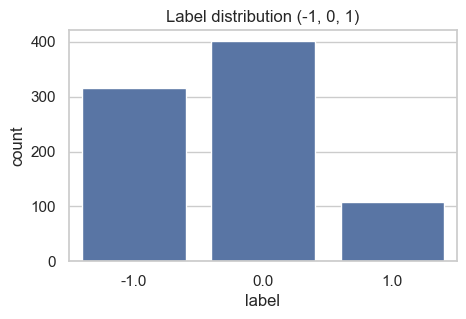

count    824.000000
mean      12.526699
std       20.409639
min        0.000000
25%        3.750000
50%        7.000000
75%       14.000000
max      231.000000
Name: n_tokens, dtype: float64

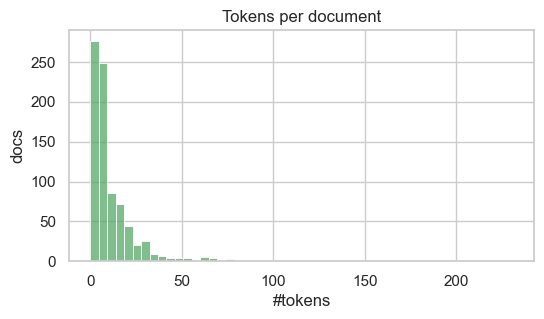

In [5]:
# Phase 1 — EDA: labels and lengths

df["label"] = df["label"].astype(float)
label_counts = df["label"].value_counts().sort_index()
display(label_counts.to_frame("count"))

plt.figure(figsize=(5,3))
sns.barplot(x=label_counts.index.astype(str), y=label_counts.values, color="#4C72B0")
plt.title("Label distribution (-1, 0, 1)")
plt.xlabel("label"); plt.ylabel("count")
plt.show()

# Text length distributions
df["n_tokens"] = df["text"].astype(str).apply(lambda t: len(simple_tokenize(t)))
display(df["n_tokens"].describe())

plt.figure(figsize=(6,3))
sns.histplot(df["n_tokens"], bins=50, color="#55A868")
plt.title("Tokens per document")
plt.xlabel("#tokens"); plt.ylabel("docs")
plt.show()

Docs: 824 Features: 403


,token,freq
0,just,95
1,trump,92
2,like,83
3,market,82
4,china,72
5,think,52
6,people,51
7,going,50
8,good,46
9,money,46


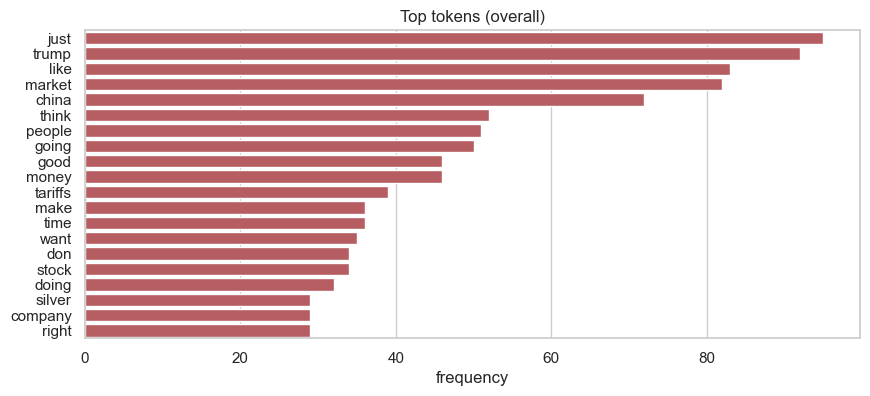

In [6]:
# Phase 1 — Bag-of-Words (CountVectorizer)

def analyzer(doc: str):
    return simple_tokenize(doc)

vectorizer = CountVectorizer(analyzer=analyzer, min_df=5, max_df=0.85, max_features=20000, ngram_range=(1,1))
X = vectorizer.fit_transform(df["text"].astype(str))
vocab = np.array(vectorizer.get_feature_names_out())

print("Docs:", X.shape[0], "Features:", X.shape[1])

# Top tokens overall
freq = np.asarray(X.sum(axis=0)).ravel()
top_idx = np.argsort(-freq)[:30]
top_tokens = pd.DataFrame({"token": vocab[top_idx], "freq": freq[top_idx]})
display(top_tokens.head(10))

plt.figure(figsize=(10,4))
sns.barplot(x="freq", y="token", data=top_tokens.head(20), color="#C44E52")
plt.title("Top tokens (overall)")
plt.xlabel("frequency"); plt.ylabel("")
plt.show()


Label -1.0 — docs: 315


,token,freq
0,trump,60
1,china,46
2,just,43
3,people,28
4,like,28
5,market,27
6,think,25
7,going,24
8,money,22
9,make,21


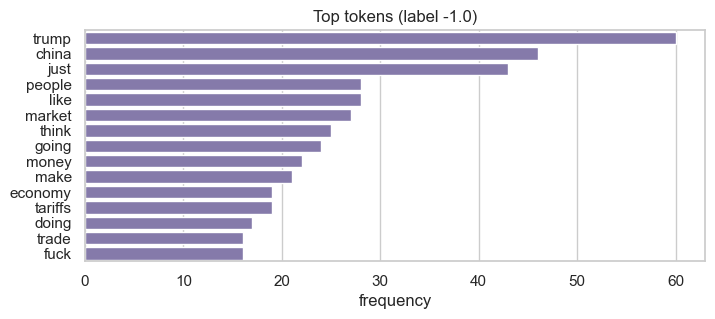


Label 0.0 — docs: 401


,token,freq
0,market,47
1,like,46
2,just,36
3,trump,24
4,stock,24
5,china,23
6,company,22
7,want,22
8,people,20
9,money,20


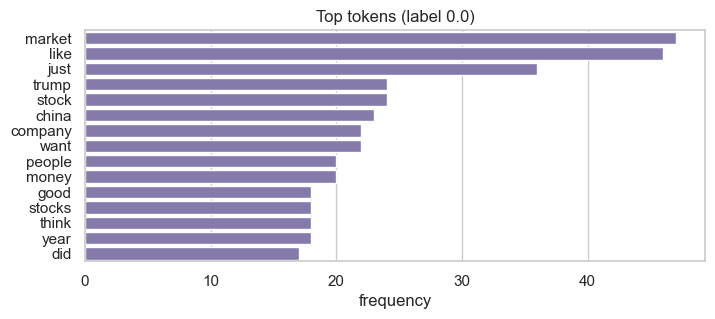


Label 1.0 — docs: 108


,token,freq
0,just,16
1,good,14
2,technology,12
3,think,9
4,going,9
5,doing,9
6,time,9
7,like,9
8,silver,8
9,trump,8


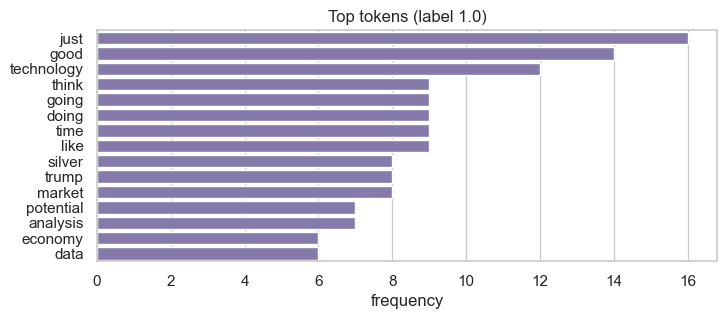

In [7]:
# Phase 1 — Top tokens per label

def top_tokens_for_label(lbl, k=20):
    idx = np.where(df["label"].values == lbl)[0]
    if len(idx) == 0:
        return pd.DataFrame(columns=["token","freq"])
    X_sub = X[idx]
    f = np.asarray(X_sub.sum(axis=0)).ravel()
    order = np.argsort(-f)[:k]
    return pd.DataFrame({"token": vocab[order], "freq": f[order]})

for lbl in [-1.0, 0.0, 1.0]:
    tt = top_tokens_for_label(lbl, k=15)
    print(f"\nLabel {lbl} — docs: { (df['label']==lbl).sum() }")
    display(tt)

    plt.figure(figsize=(8,3))
    sns.barplot(x="freq", y="token", data=tt, color="#8172B2")
    plt.title(f"Top tokens (label {lbl})")
    plt.xlabel("frequency"); plt.ylabel("")
    plt.show()

In [8]:
# Phase 1 — Save minimal artifacts

df[["text","label","n_tokens"]].to_csv(os.path.join(OUT_DIR, "phase1_clean.csv"), index=False)

import scipy.sparse as sp, joblib
sp.save_npz(os.path.join(OUT_DIR, "phase1_bow.npz"), X)
joblib.dump(vectorizer, os.path.join(OUT_DIR, "phase1_vectorizer.joblib"))
print("Saved to:", OUT_DIR)

Saved to: outputs


In [ ]:
import numpy as np
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1) Build feature matrices
count_vec = CountVectorizer(analyzer=lambda d: simple_tokenize(d), min_df=3)
tfidf_vec = TfidfVectorizer(analyzer=lambda d: simple_tokenize(d), min_df=3, max_df=0.9)

X_counts = count_vec.fit_transform(df["text"].astype(str))
X_tfidf = tfidf_vec.fit_transform(df["text"].astype(str))
y = df["label"].values

# 2) train/test split (stratify to keep label balance)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_counts, y, test_size=0.2, stratify=y, random_state=42)
Xt_train, Xt_test, yt_train, yt_test = train_test_split(X_tfidf, y, test_size=0.2, stratify=y, random_state=42)

# 3) MultinomialNB on raw counts (standard choice)
mnb_counts = MultinomialNB()
mnb_counts.fit(Xc_train, yc_train)
y_pred_counts = mnb_counts.predict(Xc_test)

print("MultinomialNB on raw counts")
print("Accuracy:", accuracy_score(yc_test, y_pred_counts))
print(classification_report(yc_test, y_pred_counts, zero_division=0))
print("Confusion matrix:\n", confusion_matrix(yc_test, y_pred_counts))

# 4) ComplementNB on TF-IDF (often better with TF-IDF / class imbalance)
cnb_tfidf = ComplementNB()
cnb_tfidf.fit(Xt_train, yt_train)
y_pred_tfidf = cnb_tfidf.predict(Xt_test)

print("\nComplementNB on TF-IDF")
print("Accuracy:", accuracy_score(yt_test, y_pred_tfidf))
print(classification_report(yt_test, y_pred_tfidf, zero_division=0))
print("Confusion matrix:\n", confusion_matrix(yt_test, y_pred_tfidf))

# 5) Optional: MultinomialNB on TF-IDF for comparison
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(Xt_train, yt_train)
y_pred_mnb_tfidf = mnb_tfidf.predict(Xt_test)

print("\nMultinomialNB on TF-IDF (comparison)")
print("Accuracy:", accuracy_score(yt_test, y_pred_mnb_tfidf))
print(classification_report(yt_test, y_pred_mnb_tfidf, zero_division=0))

# 6) Augmentation experiment: append binary presence pattern to TF-IDF features
X_presence = (X_counts > 0).astype(int)            # binary indicator features
# align train/test splits for counts presence using same random_state split indices
_, Xp_test, _, yp_test = train_test_split(X_presence, y, test_size=0.2, stratify=y, random_state=42)
Xp_train, _, yp_train, _ = train_test_split(X_presence, y, test_size=0.2, stratify=y, random_state=42)  # just to get train part

# concatenate TF-IDF + binary presence
Xt_aug_train = hstack([Xt_train, Xp_train])
Xt_aug_test = hstack([Xt_test, Xp_test])

cnb_aug = ComplementNB()
cnb_aug.fit(Xt_aug_train, yt_train)
y_pred_aug = cnb_aug.predict(Xt_aug_test)

print("\nComplementNB on TF-IDF + binary-presence augmentation")
print("Accuracy:", accuracy_score(yt_test, y_pred_aug))
print(classification_report(yt_test, y_pred_aug, zero_division=0))

# Short summary comments
print("\nNotes:")
print("- MultinomialNB is a natural choice for raw counts.")
print("- TF-IDF often benefits from ComplementNB (or smoothing variants) because TF-IDF weights change feature distributions.")
print("- Augmenting TF-IDF with simple binary presence can sometimes improve recall for classes where rare-but-discriminative tokens matter; check the printed reports to decide.")


MultinomialNB on raw counts
Accuracy: 0.593939393939394
              precision    recall  f1-score   support

        -1.0       0.59      0.62      0.60        63
         0.0       0.61      0.68      0.64        80
         1.0       0.45      0.23      0.30        22

    accuracy                           0.59       165
   macro avg       0.55      0.51      0.52       165
weighted avg       0.58      0.59      0.58       165

Confusion matrix:
 [[39 21  3]
 [23 54  3]
 [ 4 13  5]]

ComplementNB on TF-IDF
Accuracy: 0.5393939393939394
              precision    recall  f1-score   support

        -1.0       0.56      0.60      0.58        63
         0.0       0.61      0.53      0.56        80
         1.0       0.32      0.41      0.36        22

    accuracy                           0.54       165
   macro avg       0.50      0.51      0.50       165
weighted avg       0.55      0.54      0.54       165

Confusion matrix:
 [[38 16  9]
 [28 42 10]
 [ 2 11  9]]

MultinomialNB on

# Phase 2

In [10]:
### Begin Assignment Here